### Problem Statement:

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load csv file
advertising=pd.read_csv("E:\\Data Science\\Data science Practise project\\Advertising.csv")
advertising.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
advertising.shape

(200, 5)

dataset has 200 rows and 5 columns

In [4]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


Total 5 columns are there outof 5 columns 4 column has float data and 1 column has integer data, no column contain null values

In [5]:
advertising.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Describe method cant show data of column which has text data.We get stastical analysis of dataset, we get mean and standard deviation of each column, min and max shows minimum and maximum value of each column.25% denotes first quartle of data,50% denotes second quartile,and 75% denotes third quartile of datafram

In [6]:
advertising.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

No null value present in our dataset

In our dataset total 5 columns are present, out of 5,3 column belongs to feature('TV','radio','newspaper') and 'sale' is label or target variable.first column'Unnamed:0' is not usefull for us, so we will drop it.

In [7]:
advertising.drop(columns=['Unnamed: 0'],inplace=True)

In [8]:
advertising.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### our label or target "sales" is having continous data, so our problem belongs to regression type

In [9]:
# sometime space is present in dataset and it is considered as data ,so lets whether space is pesent in our dataset or not
advertising.loc[advertising['TV']==" "]
advertising.loc[advertising['radio']==" "]
advertising.loc[advertising['newspaper']==" "]
advertising.loc[advertising['sales']==" "]

,TV,radio,newspaper,sales


No empty space is present in our dataset,so we proceed to next step

# Bivariate Analysis

Now we will plot scatter plot to see relation between each feature with lable

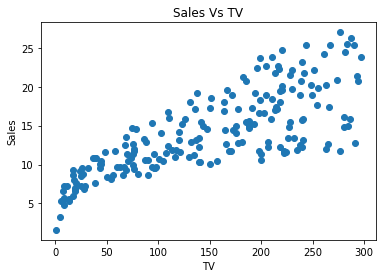

In [10]:
plt.scatter(advertising['TV'],advertising['sales'])
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Sales Vs TV')
plt.show()

by looking above scatter plot of (Sales Vs TV)  we conclude that Tv and Sale has almost linear relationship among each other,as TV number increase Sales also increase and vice versa

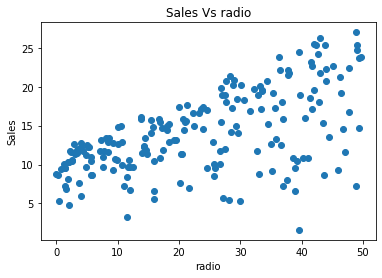

In [11]:
plt.scatter(advertising['radio'],advertising['sales'])
plt.xlabel('radio')
plt.ylabel('Sales')
plt.title('Sales Vs radio')
plt.show()

In scatter plot of Sales Vs Radio, we conclude that, relationship between sales and radio is some linear, not perfect linear, we can atleast 50 to 60% linearity is there.

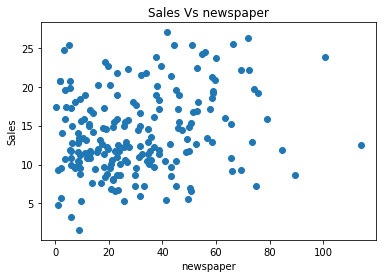

In [12]:
plt.scatter(advertising['newspaper'],advertising['sales'])  # giving x cordinates and y cordinates
plt.xlabel('newspaper')  # x axis label is newspaper
plt.ylabel('Sales')  # y axis lable is sales
plt.title('Sales Vs newspaper')
plt.show()  # diplay graph

In scatterplot of newspaper Vs Sales, there exist no relationship between newpaper and sales,  if newspaper number increase then there is no effect on Sales

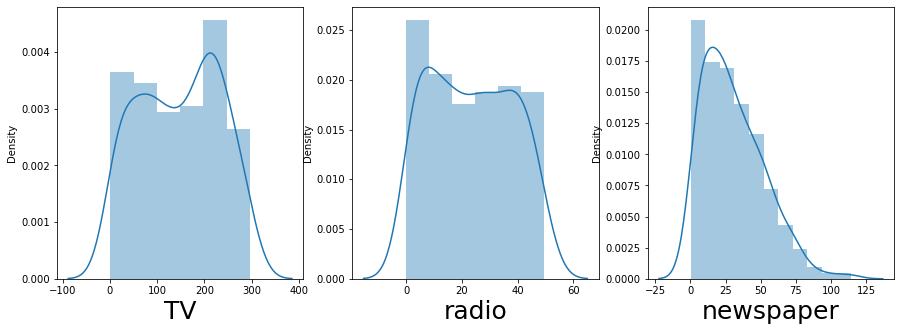

In [13]:
plt.figure(figsize=(15,5))   # here we give row and column wise dimension
plotnumber=1  # initially plotnumber is set to 1
for column in advertising:  #  we pass every column of dataframe into for loop
    if plotnumber<=3: # maximmum plotnumber is 3
        plt.subplot(1,3,plotnumber) # we plot all distplot in 1row and in 3 columns
        ax=sns.distplot(advertising[column]) # we plot distribution plot for every column
        plt.xlabel(column,fontsize=25)# assign column name to each x axis
    plotnumber+=1 # plotnumber is incremented by 1
plt.show() # display graph

The distibution graph of TV and Radio looks Normally distributed(not perfect) .The Distribution graph for newspaper has right skewed nature

# Univariate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

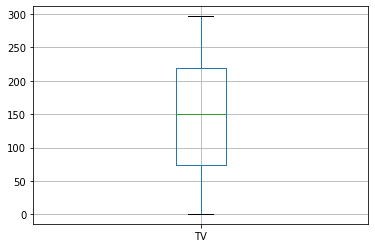

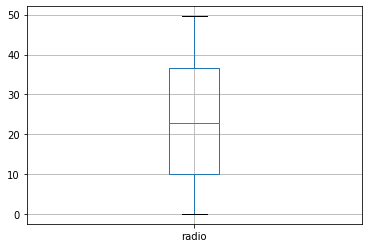

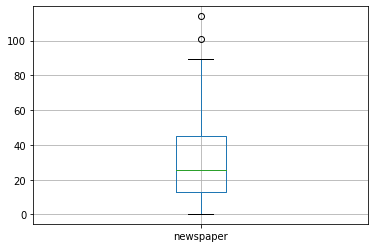

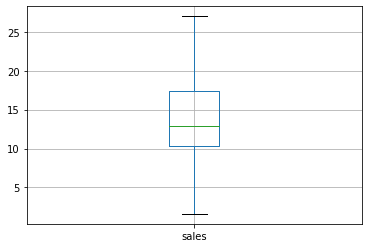

In [14]:
# lets draw the Box plot to indentify the outlier in the the dataframe
# now we will see any outlier present in our dataset using box plot
for column in advertising:  # we pass every column to for loop
    plt.figure()   
    advertising.boxplot([column]) # box plot of every column is plotted
plt.show

Boxplot is univariate analysis, in which we can easily detect outliers,Boxplot has three quartile,It contains outlier below first quartile and above third quartile, in above boxplot, only feature "newspaper" has outlier above third quartile, remaining features has no outliers, we will not remove outlier of target columns

In [15]:
# lets use z score to remove outliers
from scipy.stats import zscore # z score represent the number of  standard deviation with which value of observation differ than mean value
z=np.abs(zscore(advertising))
advertising1=advertising[(z<3).all(axis=1)]  # z score with std deviation =3

We can placed z score on normal distribution curve ranges from -3 standard deviation to the left of normal distribution curve to +3 S.D to right of normal distribution ,there we select z<3,and with value it cover almost 97.72 area of Distribution

<function matplotlib.pyplot.show(close=None, block=None)>

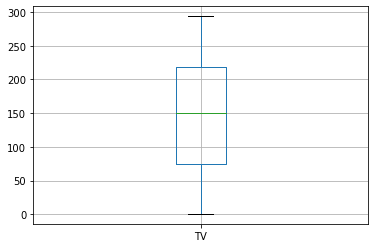

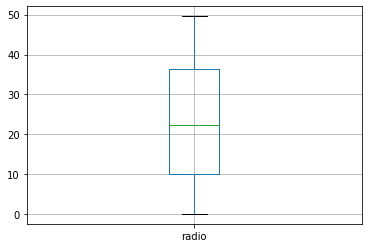

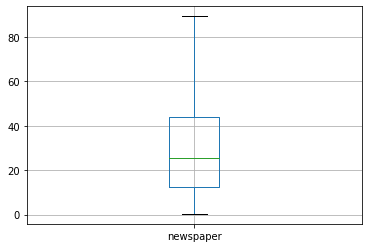

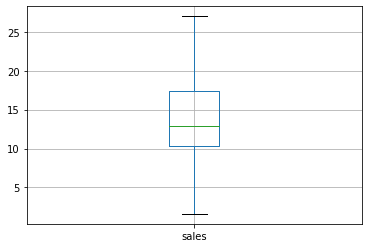

In [16]:
for column in advertising1:  # we pass every column to for loop
    plt.figure()   
    advertising1.boxplot([column]) # box plot of every column is plotted
plt.show

here again we plot boxplot, to see outliers are removed or not, newspaper outliers are removed by using zscore method

In [17]:
advertising1.shape

(198, 4)

By removing outliers from dataset, we lost 2 rows,from 200 rows  we have now 198 rows

# Multivariate Analysis

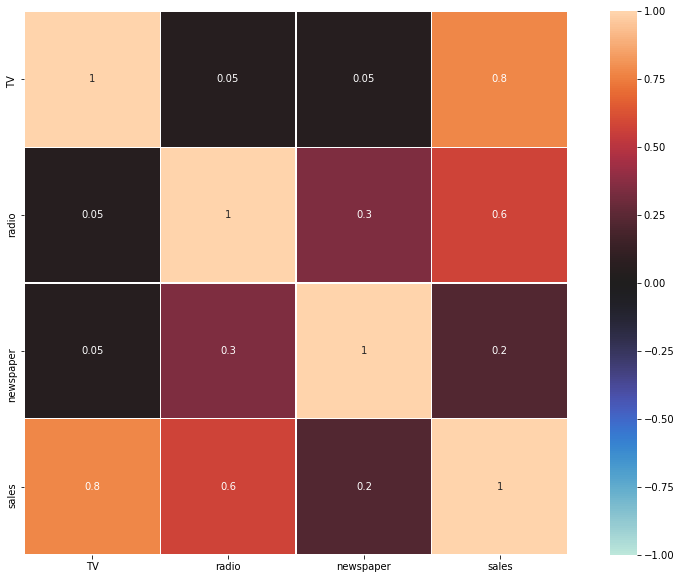

In [18]:
# lets plot heatmap which is multivaraiate analysis,find the coeffient of multicollinearity
df_corr=advertising1.corr().abs()
plt.figure(figsize=(15,10))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.1g',linewidth=.1)
plt.show()

Heatmap is used to find correlation between independant variable and Target variable, value 1 indicate correlation of label verses label, correaltion between feature 'Newspaper' with other feature is very less,The correlation between feature 'TV' and  label'Sales'is 0.8, The feature "Newpaper" has lowest correaltion with other feature and with target column

In [19]:
corr_matrix=advertising1.corr()   # here we get values of correlation in descending order
corr_matrix['sales'].sort_values(ascending=False)

sales        1.000000
TV           0.779121
radio        0.576748
newspaper    0.219555
Name: sales, dtype: float64

first value 1 shows relation between label verses label, so ignore it. the value of correation ranges between -1 to +1, 1 shows strong positive correlation between variable,it means if one variable increses other also increase,-1 represent strong negative correlation between variable,it means if one variable value increase other goes on decreasing, value 0 or near to 0 represents no correlation between variable, 

In [20]:
advertising1.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

skewness range is + 0.5 to -0.5 anything between this range is permissible and outside this range is high skewness,newspaper value is out of range

In [21]:
x=advertising1.drop(columns=['sales'],axis=1)
y=advertising1['sales']

x shows feature columns only, we drop target column "Sales" and store into y

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)  # we pass all feature to scaler , and we get transformed values

Standard scaler removes the mean and scales each features to unit variance ,we got all transformed values,generally it is useful for those feature which has normal distribution

In [23]:
x_scaled

array([[ 0.97869734,  0.98952135,  1.93299778],
       [-1.19901165,  1.09070498,  0.75131275],
       [-1.51933199,  1.53591293,  1.93790103],
       [ 0.05645636,  1.22561648,  1.40834924],
       [ 0.40024339, -0.83178391,  1.40344598],
       [-1.61906543,  1.73828018,  2.2173867 ],
       [-1.04647815,  0.6522426 , -0.30779084],
       [-0.31079737, -0.23817331, -0.89127846],
       [-1.62023876, -1.41864895, -1.41102374],
       [ 0.62317696, -1.38492107, -0.42056576],
       [-0.94557138, -1.16906267, -0.27346804],
       [ 0.79800381,  0.05863199, -1.26392602],
       [-1.44189191,  0.80739083,  1.77119028],
       [-0.57714432, -1.04764232, -1.10702179],
       [ 0.67363035,  0.65898817,  0.79544207],
       [ 0.57155024,  1.65733328,  1.13376683],
       [ 1.58061798,  1.1109417 ,  1.27596129],
       [-0.90919801, -0.17746313, -0.56276022],
       [ 0.0071763 ,  0.05188642, -0.52353416],
       [ 0.84141719,  0.30821827,  1.15828311],
       [ 1.06435076, -1.21628169, -0.307

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

Train test split is used to evaluate the performance of algorithm when we have large data,It divide the data into two set,training and testing phase, training data is used for fitting machine learning model and testing data is used for evaluating model performance
r2 score is statistical measure that repesent proportion of variance for dependant variable

In [25]:
# finding best random state
from sklearn.tree import DecisionTreeRegressor
maxAccu=0  # initially max accuracy is set to 0
MaxRs=0  # initially Random state is set to 0
for i in range(1,200): # in for loop we pass 1 to 200 number out of which random state is selected
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=i) # used train_test_split in for loop
    mod=DecisionTreeRegressor()
    mod.fit(x_train,y_train)  # fit training data of feature and label to model decision tree
    pred=mod.predict(x_test) # predict label by using test features
    acc=r2_score(y_test,pred) # genrate accuracy score by comparing test label and predicted label
    if acc> maxAccu:
        maxAccu=acc # assign accuracy score to max accuracy
        MaxRs=i  # the number at which we get maxaccuracy is treated as random state
print('Best Accuracy is',maxAccu,"on Random state",MaxRs)

Best Accuracy is 0.9780595838569941 on Random state 155


In [26]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=MaxRs)

In train test split we pass x scaled  and y output, test size is 25% and random state is MaxRs  which is generated by above code

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from  sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR

now we want to build total six regression model

In [28]:
# model instantiating and training
Li_reg=LinearRegression()  # assign linear regression as Li_reg
Li_reg.fit(x_train,y_train) # fit train feature and label to linear regression


LinearRegression()

In [29]:
# find r2 score for trained model
Li_reg.score(x_train,y_train)  # find r2 score for train data

0.8959824712427746

In [30]:
# lets check,how model fits to test data
Li_reg.score(x_test,y_test)

0.8863701695494537

In [31]:
pred1=Li_reg.predict(x_test)  # now we predict label by passing test feature
Linear_regression_score=r2_score(y_test,pred1) # we get r2 score by passing predicted label and actual label
Linear_regression_score

0.8863701695494537

In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [33]:
mean_absolute_error(y_test,pred1)

1.4932959508023456

mean absolute error -it represent average error

In [34]:
mean_squared_error(y_test,pred1)

3.6429219125997965

It is similar to MAE but noise is largerand large error are punished.it is harder to interpret than MAE as it is not in base units

In [35]:
KNR=KNeighborsRegressor()
KNR.fit(x_train,y_train)
pred2=KNR.predict(x_test)
KNR__score=r2_score(y_test,pred2)
KNR__score

0.9212373371608764

KNN store all cases and classify new model based on distance(Euclidean method),classification done by majority of votes neighbors

In [36]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred3=DTR.predict(x_test)
DTR__score=r2_score(y_test,pred3)
DTR__score

0.9758948626737064

Decision Tree builds model in the form of tree structure,it divide the dataset into smaller and smaller subset, we determine the root node,then split the subsets,repeat the process till all instance have same class

In [37]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred4=RFR.predict(x_test)
RFR__score=r2_score(y_test,pred4)
RFR__score

0.9781250688562252

It is ensemble algorithm which combines more than one algorithm of same or different kind.Random Forest gives outcome based on predictions of number of models by taking mean of output from various trees

In [38]:
ABR=AdaBoostRegressor()
ABR.fit(x_train,y_train)
pred5=ABR.predict(x_test)
ABR__score=r2_score(y_test,pred5)
ABR__score

0.9606959096273652

Adaboost regressor is meta estimator that begin by fitting a regressor on original dataset, and then fits additional copies of regressor on same dataset but where the weights of instance are adjusted 

In [39]:
svr=SVR()
svr.fit(x_train,y_train)
pred6=svr.predict(x_test)
SVR__score=r2_score(y_test,pred6)
SVR__score

0.8491097990165686

SVR is effective when number of dimensions are greater than number of samples,it uses subset of training points(support vector) and hyperplane to give classification output

In [40]:
from sklearn.model_selection import cross_val_score

CV is a technique used to check whether model is overfitted or not, if model accuracy is high, then there is chances of model is overfitted.We use CV score for every model,for this we require model,features and labels, cv is cross validation spliting strategy.finally it take mean of all iteration and return cv score

In [41]:
Linear_regression_cv_score=cross_val_score(Li_reg,x_scaled,y,cv=5).mean() # we pass Linear regression model,feature,target and cv=5 means 4 set for training and 1 for testing
Linear_regression_cv_score

0.8853605756683912

In [42]:
KNR_CV_score=cross_val_score(KNR,x_scaled,y,cv=5).mean() # we pass KNR model,feature,target and cv=5 means 4 set for training and 1 for testing
KNR_CV_score

0.9367560788064591

In [43]:
DTR_CV_score=cross_val_score(DTR,x_scaled,y,cv=5).mean() # we pass model Decision Tree Regressor,feature,target and cv=5 means 4 set for training and 1 for testing
DTR_CV_score

0.9577643841877386

In [44]:
RFR_CV_score=cross_val_score(RFR,x_scaled,y,cv=5).mean() # we pass model Random Forest Regressor,feature,target and cv=5 means 4 set for training and 1 for testing
RFR_CV_score

0.9765185104911683

In [45]:
ABR_CV_score=cross_val_score(ABR,x_scaled,y,cv=5).mean() # we pass model Ada boost Regressor,feature,target and cv=5 means 4 set for training and 1 for testing
ABR_CV_score

0.9531880911954808

In [46]:
SVR_CV_score=cross_val_score(svr,x_scaled,y,cv=5).mean() # we pass model Support Vector Regressor,feature,target and cv=5 means 4 set for training and 1 for testing
SVR_CV_score

0.9105355050541174

In [47]:
Linear_regression_diff=Linear_regression_score*100-Linear_regression_cv_score*100
print('Linear_regression_diff',Linear_regression_diff)
KNR_diff=KNR__score*100-KNR_CV_score*100
print('KNR_diff',KNR_diff)
DTR_diff=DTR__score*100-DTR_CV_score*100
print("DTR_diff",DTR_diff)
RFR_diff=RFR__score*100-RFR_CV_score*100
print("RFR_diff",RFR_diff)
ABR_diff=ABR__score*100-ABR_CV_score*100
print("ABR_diff",ABR_diff)
SVR_diff=SVR__score*100-SVR_CV_score*100
print("SVR_diff",SVR_diff)

Linear_regression_diff 0.10095938810624716
KNR_diff -1.5518741645582708
DTR_diff 1.8130478485967814
RFR_diff 0.16065583650569693
ABR_diff 0.7507818431884346
SVR_diff -6.142570603754876


 In above line, we take difference of r2 score of each model with cross vaidation score of that model, we multiply the differnce by 100 to get percentage values

In [48]:
print("Linear_regression_score",Linear_regression_score)
print("Linear_regression_cv_score", Linear_regression_cv_score)
print("Linear_regression_diff", Linear_regression_diff)
print("-------------------------------------------------------------------------------------------")
print("KNR__score",KNR__score)
print("KNR_CV_score",KNR_CV_score)
print("KNR_diff",KNR_diff)
print("-------------------------------------------------------------------------------------------")
print("DTR__score",DTR__score)
print("DTR_CV_score", DTR_CV_score)
print("DTR_diff",DTR_diff)

print("-------------------------------------------------------------------------------------------")
print("RFR__score",RFR__score)
print("RFR_CV_score",RFR_CV_score)
print("RFR_diff", RFR_diff)
print("-------------------------------------------------------------------------------------------")

print("ABR__score",ABR__score)
print("ABR_CV_score",ABR_CV_score)
print("ABR_diff",ABR_diff)
print("-------------------------------------------------------------------------------------------")
print("SVR__score",SVR__score)
print("SVR_CV_score",SVR_CV_score) 
print("SVR_diff",SVR_diff)


Linear_regression_score 0.8863701695494537
Linear_regression_cv_score 0.8853605756683912
Linear_regression_diff 0.10095938810624716
-------------------------------------------------------------------------------------------
KNR__score 0.9212373371608764
KNR_CV_score 0.9367560788064591
KNR_diff -1.5518741645582708
-------------------------------------------------------------------------------------------
DTR__score 0.9758948626737064
DTR_CV_score 0.9577643841877386
DTR_diff 1.8130478485967814
-------------------------------------------------------------------------------------------
RFR__score 0.9781250688562252
RFR_CV_score 0.9765185104911683
RFR_diff 0.16065583650569693
-------------------------------------------------------------------------------------------
ABR__score 0.9606959096273652
ABR_CV_score 0.9531880911954808
ABR_diff 0.7507818431884346
-------------------------------------------------------------------------------------------
SVR__score 0.8491097990165686
SVR_CV_score 0.9

 we select Random Forest regressor as a best model , because r2 score and cv score for RFR is highest and difference is not more, in linear regression, we get less differene than RFR but, R2 score and Cv score for linear regression is less than RFR, so i chose RFR for hyperparameter tuning

In [49]:
from sklearn.model_selection import GridSearchCV

GridsearchCV is parameter tuning approach which build and evaluate the model performance based on best parameters, we pass parameters of only those model which has less difference between accuracy and cv score. after passing the  best parameter we can get best and authenticated accuracy which is not overfitted also

In [50]:
params={'n_estimators':[10,12,13],
       'criterion':['mse'],
       'max_depth':[10,15],
       'min_samples_leaf':[5,6],
       'min_samples_split':[10,11]}

Here we created list of parameter for Random Forest Regressor

In [51]:
Grid_RFR=GridSearchCV(RandomForestRegressor(),param_grid=params,cv=5)
Grid_RFR.fit(x_train,y_train)
Grid_RFR.best_params_

{'criterion': 'mse',
 'max_depth': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 13}

now we will pass this parameter to Random forest classifier to get best r2 score

In [55]:
Final_RFR=RandomForestRegressor(criterion='mse',max_depth=10,min_samples_leaf= 5,min_samples_split=10,n_estimators=13)
Final_RFR.fit(x_train,y_train)
final_pred=Final_RFR.predict(x_test)
final_score=r2_score(y_test,final_pred)
print(final_score*100)

95.64833871597791


here we get r2 score in between 95 to 97 for Random forest regressor

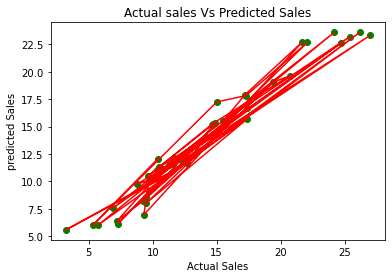

In [58]:
plt.scatter(y_test,final_pred,color='g')  # plot scatter of actual sales Vs predicted sales
plt.plot(y_test,final_pred,color='r') # here we plot line plot for actual sales vs predicted sales
plt.xlabel("Actual Sales") # x axis label is "Actual Sales"
plt.ylabel("predicted Sales")# y axis label is "predicted sales"
plt.title('Actual sales Vs Predicted Sales') # Titel is given
plt.show()  # display graph

By observing both output, we plot scatter plot as well as line plot, it shows, perfect linear relationship between "actual sales" and "Predicted Sale" ,it mean if Actual sale increase, predicted sales also increase and vice versa, which is very good parameter for model

In [59]:
import joblib
joblib.dump(Final_RFR,"Advertising sale Prediction.pkl")

['Advertising sale Prediction.pkl']

We saved our model sucessfully